In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import os

# Step 1: Load the Dataset


In [2]:
# Step 1: Load the Dataset
dataset_path = '/kaggle/input/knn-algorithm-dataset/KNNAlgorithmDataset.csv'
data = pd.read_csv(dataset_path)

# Display the first few rows of the dataset


In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimete

# Step 2: Check for missing values


In [4]:
# Step 2: Check for missing values
print("\nCheck for missing values:")
print(data.isnull().sum())


Check for missing values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dime

# Step 3: Display the data types of each column


In [5]:
# Step 3: Display the data types of each column
print("\nData types of each column:")
print(data.dtypes)


Data types of each column:
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          

# 1. Distribution of the target variable


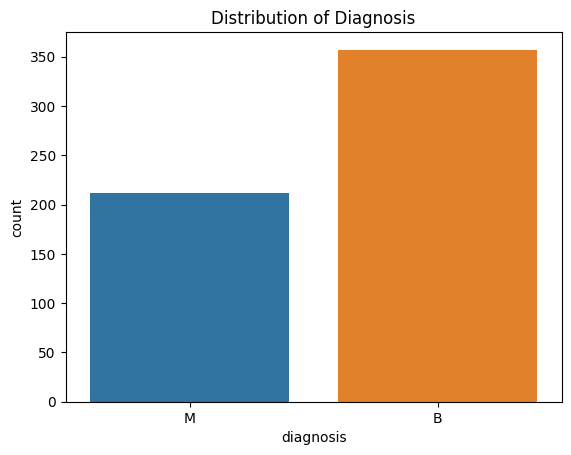

In [6]:
# 1. Distribution of the target variable
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

# 2. Distribution of mean radius


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


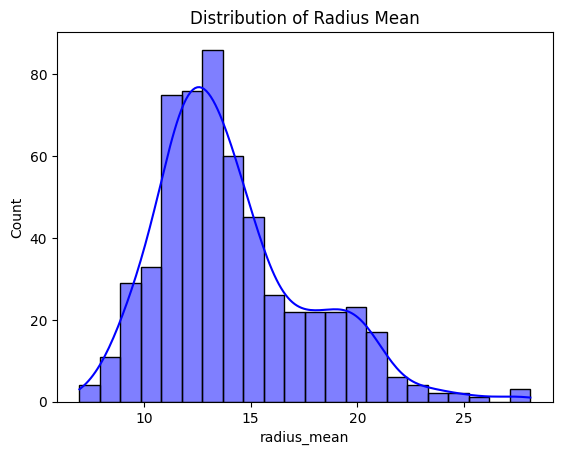

In [7]:
# 2. Distribution of mean radius
sns.histplot(data['radius_mean'], kde=True, color='blue')
plt.title('Distribution of Radius Mean')
plt.show()

# 3. Pairplot to visualize relationships between features


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

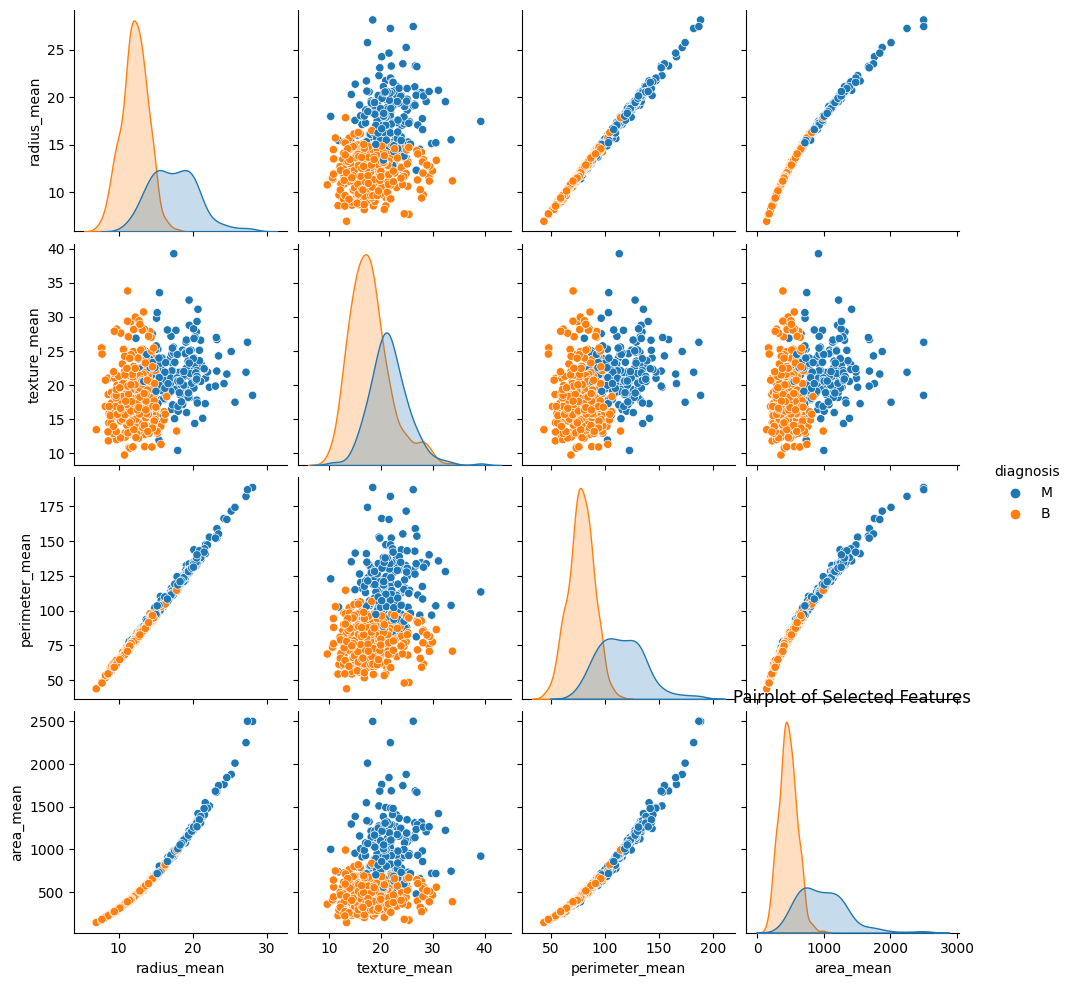

In [8]:
# 3. Pairplot to visualize relationships between features
sns.pairplot(data, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.title('Pairplot of Selected Features')
plt.show()

# 4. Heatmap of correlation matrix


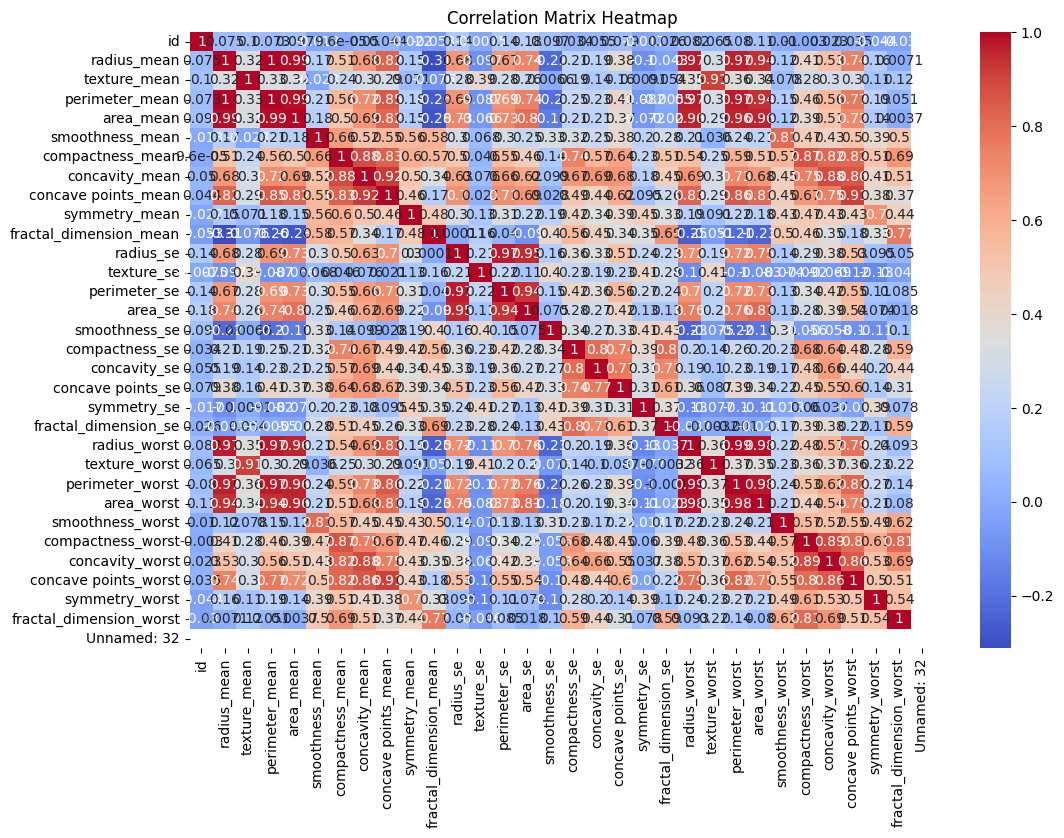

In [9]:
# 4. Heatmap of correlation matrix (excluding non-numeric columns)
plt.figure(figsize=(12, 8))

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# 5. Boxplot of radius_mean by diagnosis


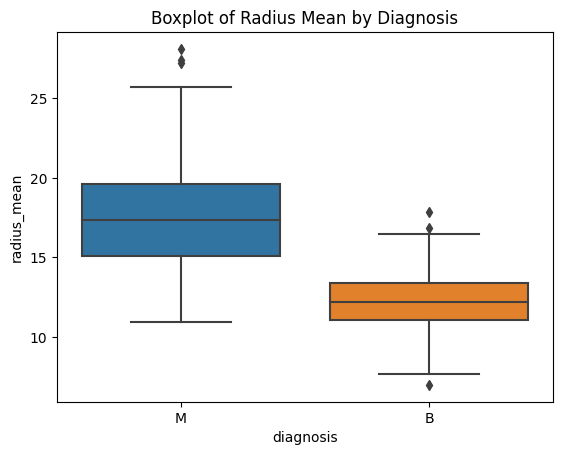

In [10]:
# 5. Boxplot of radius_mean by diagnosis
sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title('Boxplot of Radius Mean by Diagnosis')
plt.show()

# 6. Violin plot of texture_mean by diagnosis


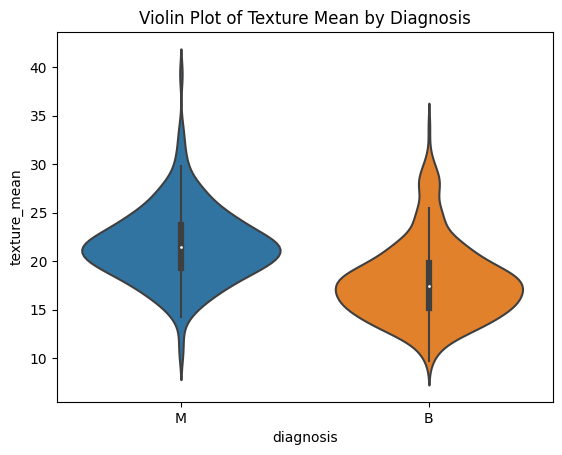

In [11]:
# 6. Violin plot of texture_mean by diagnosis
sns.violinplot(x='diagnosis', y='texture_mean', data=data)
plt.title('Violin Plot of Texture Mean by Diagnosis')
plt.show()

# 7. Distribution of perimeter_mean


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


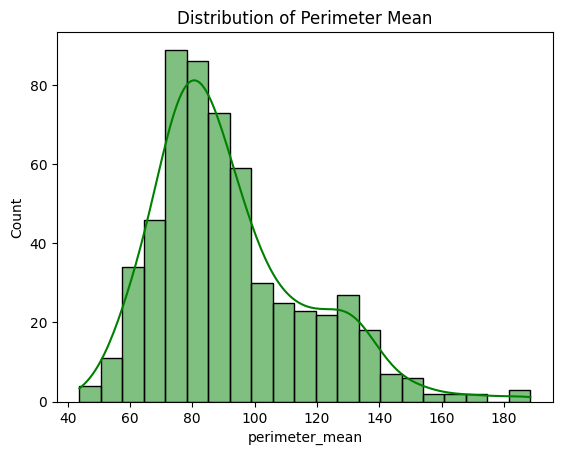

In [12]:
# 7. Distribution of perimeter_mean
sns.histplot(data['perimeter_mean'], kde=True, color='green')
plt.title('Distribution of Perimeter Mean')
plt.show()

# 8. Scatter plot of area_mean vs. perimeter_mean


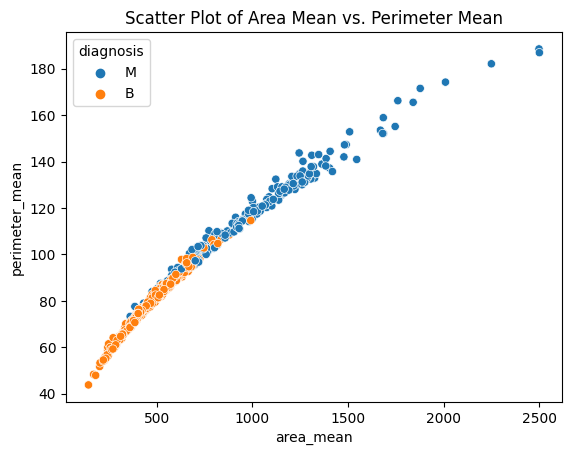

In [13]:
# 8. Scatter plot of area_mean vs. perimeter_mean
sns.scatterplot(x='area_mean', y='perimeter_mean', hue='diagnosis', data=data)
plt.title('Scatter Plot of Area Mean vs. Perimeter Mean')
plt.show()

# 9. Swarm plot of compactness_mean by diagnosis


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the mark

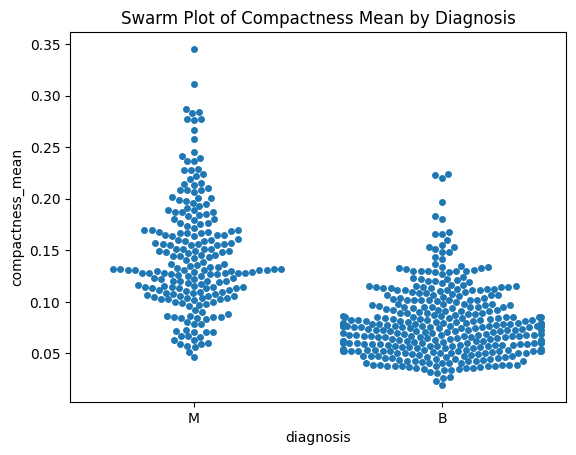

In [14]:
# 9. Swarm plot of compactness_mean by diagnosis
sns.swarmplot(x='diagnosis', y='compactness_mean', data=data)
plt.title('Swarm Plot of Compactness Mean by Diagnosis')
plt.show()

# 10. Pairplot of concavity_mean and concave points_mean


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

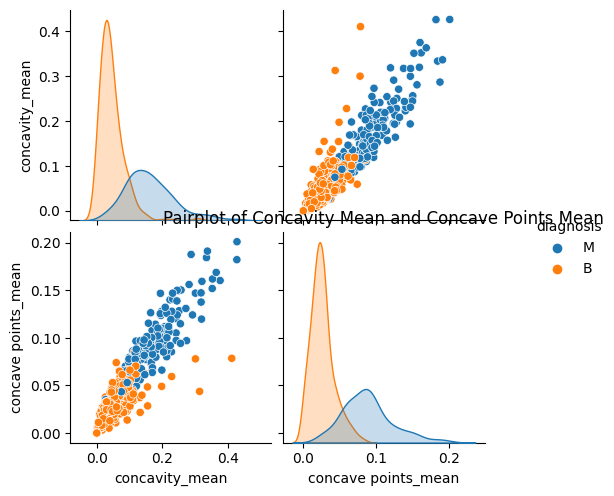

In [15]:
# 10. Pairplot of concavity_mean and concave points_mean
sns.pairplot(data, hue='diagnosis', vars=['concavity_mean', 'concave points_mean'])
plt.title('Pairplot of Concavity Mean and Concave Points Mean')
plt.show()

# Step 3: Preprocessing


In [16]:
# Step 3: Preprocessing

# Dropping the id column as it is not needed
data = data.drop(columns=['id'])

# Encoding target variable
# Splitting the dataset into features and target


In [17]:
# Encoding target variable
data['diagnosis'] = data['diagnosis'].map({'B': 0, 'M': 1})

# Splitting the dataset into features and target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Standardizing the features


In [18]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.10/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


# Splitting the dataset into training and testing sets


In [19]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Step 4: Model Implementation


In [20]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean (you can choose other strategies like median or most_frequent)
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imputed, y_train)

KNeighborsClassifier()

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Assuming you have already loaded your data and split it into X and y

# Impute missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Verify that data is not empty and has the same number of rows
if X_train_imputed.shape[0] == 0 or X_test_imputed.shape[0] == 0:
    raise ValueError("Imputed dataset is empty. Check for issues with imputation.")

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_imputed, y_train)

# Make predictions
y_pred = knn.predict(X_test_imputed)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

